## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)
data.set_pred_range(0.0, 5.0, n=200)

mosm = mogptk.MOSM(data, Q=3)
mosm.estimate_params()
mosm.train()

mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

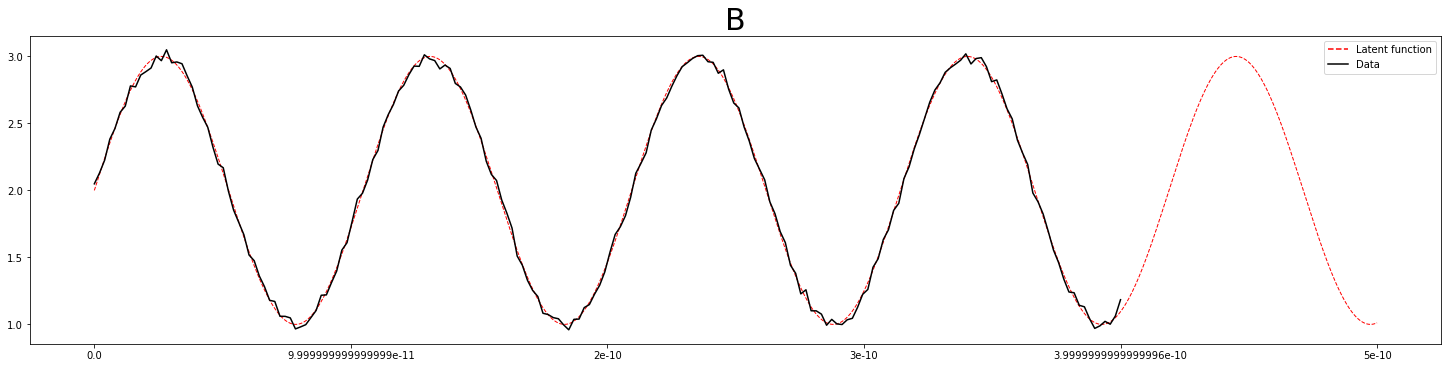

In [65]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
stretch = 1e-10
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0]/stretch)+2, n=200, start=0.0, end=4.0*stretch, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

data.set_pred_range(0.0, 5.0*stretch, n=200)

data.plot()

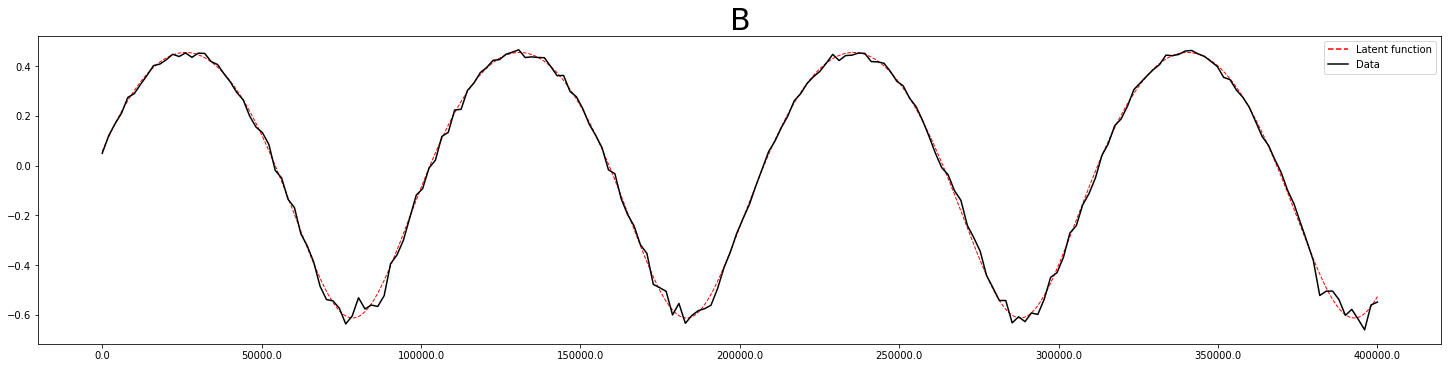

In [57]:
data.transform(mogptk.TransformLog)
data.plot()

In [4]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

Instructions for updating:
Colocations handled automatically by placer.


[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([ 1.16039123, -0.16268274, -0.52641938]),
  'mixture_scales': array([[-0.40589673, -1.03362291,  0.32901891]]),
  'mixture_means': array([[-0.13466676],
         [-0.47510533],
         [-0.64774059]])}]

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([2.61435755, 0.2258998 , 0.15974266]),
  'mixture_scales': array([[0.1928618 , 0.1430345 , 0.15194926]]),
  'mixture_means': array([[0.94046309],
         [0.61204741],
         [0.39310362]])}]

[[5.90910389]
 [3.84560729]
 [2.46994289]]


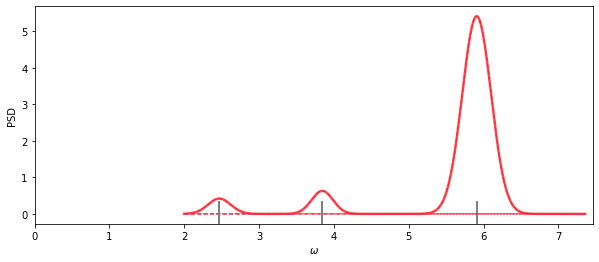

In [29]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

         Current function value: -495.306802
         Iterations: 82
         Function evaluations: 161
         Gradient evaluations: 150
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -495.306802
  Number of iterations: 82
  Number of functions evaluations: 161
Done in 0.0 minutes


[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([0.00236078, 0.13722411, 0.00023004]),
  'mixture_scales': array([[1.00184018e-06, 1.00000000e-06, 2.29447166e+00]]),
  'mixture_means': array([[1.91089196e+00],
         [9.55332546e-01],
         [1.00000000e-06]])}]

[[1.20064883e+01]
 [6.00253142e+00]
 [6.28318531e-06]]


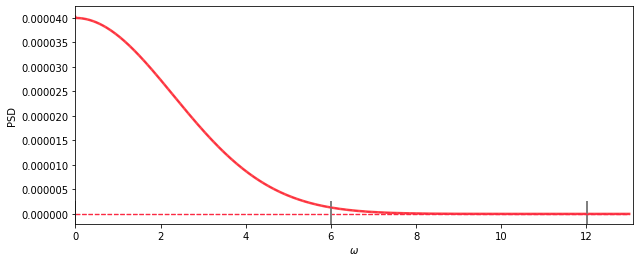

In [30]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

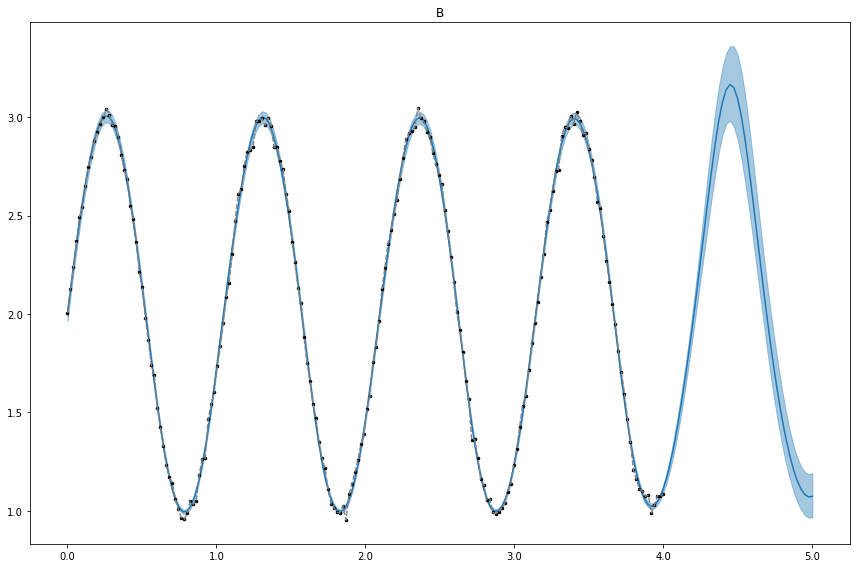

In [28]:
sm.predict(plot=True)

## MOSM

In [66]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

,magnitude,mean,variance,delay,phase,noise
q,,,,,,
0,[0.811557556737229],[[0.4322536898748235]],[[0.858373012550612]],[[0.0]],[0.0],NaN
1,[0.4629597183385364],[[0.5765972823013826]],[[0.7064251698829045]],[[0.0]],[0.0],NaN
2,[-0.38011529099024244],[[0.8150909818664858]],[[0.7133532552095755]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.2870560565775686]


In [67]:
mosm.estimate_params(method='SM')
mosm.print_params()

         Current function value: 436.123882
         Iterations: 4
         Function evaluations: 63
         Gradient evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 436.123882
  Number of iterations: 4
  Number of functions evaluations: 63
Done in 0.0 minutes


,magnitude,mean,variance,delay,phase,noise
q,,,,,,
0,[1.0],[[31577750922.43549]],[[6062998095685277.0]],[[0.0]],[0.0],NaN
1,[1.0],[[57215132859.462326]],[[2243845337587298.8]],[[0.0]],[0.0],NaN
2,[1.0],[[31577750922.43549]],[[6062998095685277.0]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.016833171446357282]


In [68]:
mosm.train()
mosm.print_params()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-591fa548-282/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-59-35393bfffb66>", line 1, in <module>
    mosm.estimate_params(method='SM')  File "../mogptk/mosm.py", line 102, in estimate_params
    params = _estimate_from_sm(self.dataset, self.Q, method=sm_method, optimizer=sm_opt, maxiter=sm_maxiter, plot=plot)  File "../mogptk/sm.py", line 39, in _estimate_from_sm
    sm.estimate_params(method)  File "../mogptk/sm.py", line 106, in __init__
    self._build(kernel, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 79, in _build
    self.model = gpflow.model

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SpectralMixture-2ac7d6e9-273/mixture_scales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-59-35393bfffb66>", line 1, in <module>
    mosm.estimate_params(method='SM')  File "../mogptk/mosm.py", line 102, in estimate_params
    params = _estimate_from_sm(self.dataset, self.Q, method=sm_method, optimizer=sm_opt, maxiter=sm_maxiter, plot=plot)  File "../mogptk/sm.py", line 39, in _estimate_from_sm
    sm.estimate_params(method)  File "../mogptk/sm.py", line 106, in __init__
    self._build(kernel, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-2ef46291-311/magnitude/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-62-b2f44e1ff2c9>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 58, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/envs/

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-828659c0-303/mean/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-62-b2f44e1ff2c9>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 58, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/envs/py36/

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-e8a8bfd7-297/mean/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-62-b2f44e1ff2c9>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 58, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/envs/py36/

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-33dc96c1-327/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-62-b2f44e1ff2c9>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 58, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 79, in _build
    self.model = gpflow.models.SVGP(x, y, kernel, self.likelihood)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157

,magnitude,mean,variance,delay,phase,noise
q,,,,,,
0,[5.975542862421401],[[31577750922.43549]],[[6062998095685277.0]],[[0.0]],[0.0],NaN
1,[19.665122427467974],[[57215132859.462326]],[[2243845337587298.8]],[[0.0]],[0.0],NaN
2,[5.975542862421401],[[31577750922.43549]],[[6062998095685277.0]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.017105314352766462]


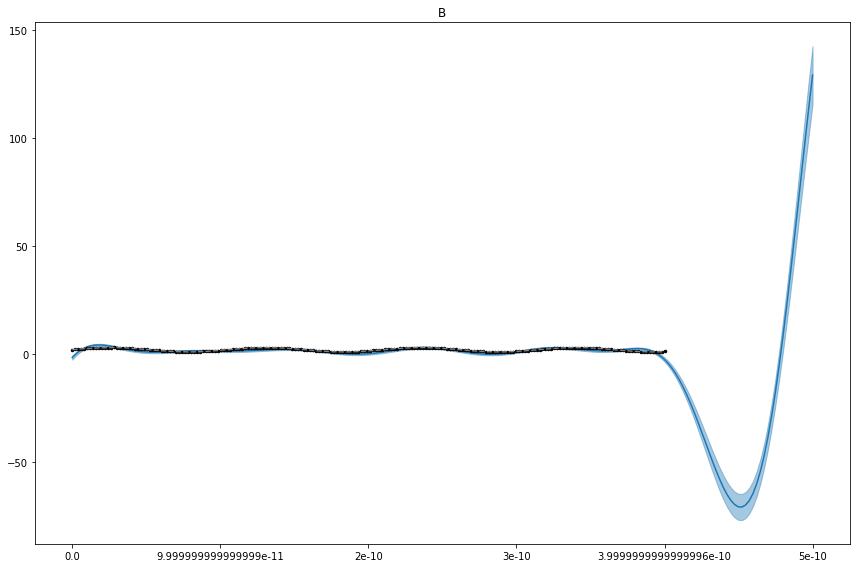

In [69]:
mosm.predict(plot=True)

### Plot

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac7ca80320>]] 1 1


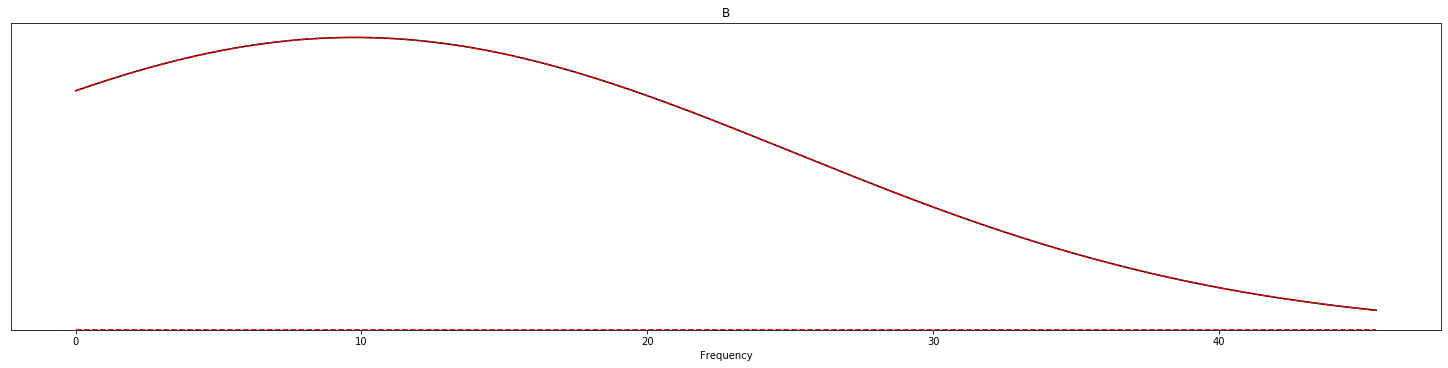

In [46]:
mosm.plot()

(<Figure size 1440x1008 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac7cd024e0>]],
       dtype=object))

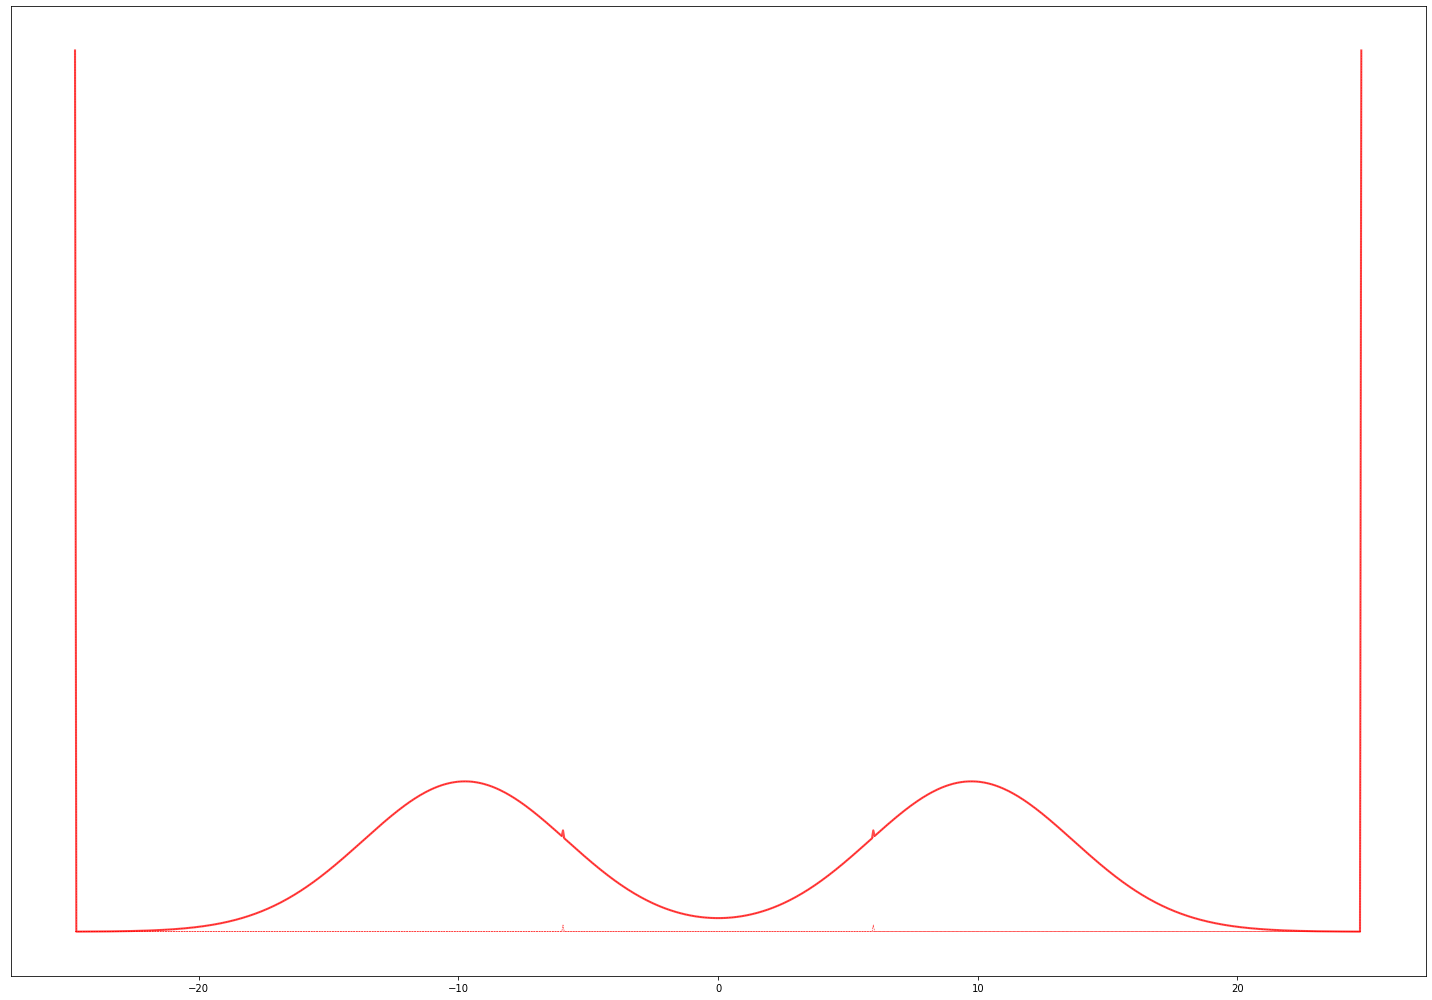

In [47]:
mosm.plot_psd()

(<Figure size 432x288 with 2 Axes>,
 array([[1.]]))

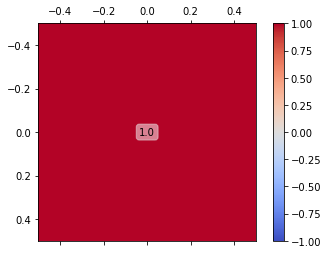

In [42]:
mosm.plot_correlations()

In [48]:
mosm.info()

‣ MOSM approaches RBF kernel for Q=2 in channel='B'


### Saving and loading

In [ ]:
mosm.save_params('mosm')
mosm.print_params()

In [ ]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

In [ ]:
mosm2.predict(plot=True)

## SM-LMC

In [13]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

,constant,mean,variance,noise
Q,,,,
0,[[2.023990309277906]],[0.14798870293229982],[0.36076048133687333],NaN
1,[[-0.1516705750897189]],[0.995257052720988],[0.8523481721133889],NaN
2,[[-1.6466622999307208]],[0.5303232980556395],[0.42604505621219135],NaN
3,NaN,NaN,NaN,[0.1183750510404441]


In [14]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

,constant,mean,variance,noise
Q,,,,
0,[[1.0]],[5.909103885485487],[0.19286180363069239],NaN
1,[[1.0]],[3.845607290554047],[0.14303450326166356],NaN
2,[[1.0]],[2.469942893933087],[0.15194926274343376],NaN
3,NaN,NaN,NaN,[0.004744367711760713]


In [15]:
smlmc.train()
smlmc.print_params()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -292.804223
  Number of iterations: 55
  Number of functions evaluations: 88
Done in 0.0 minutes


,constant,mean,variance,noise
Q,,,,
0,[[-0.3742664238228582]],[5.9946158279155295],[2.229139744210867e-06],NaN
1,[[5.614833989607162e-06]],[3.0976547772113907],[0.1374723672900299],NaN
2,[[1.0692885290672901e-05]],[3.1651760286404724],[0.09267510694576346],NaN
3,NaN,NaN,NaN,[0.0028739768449961337]


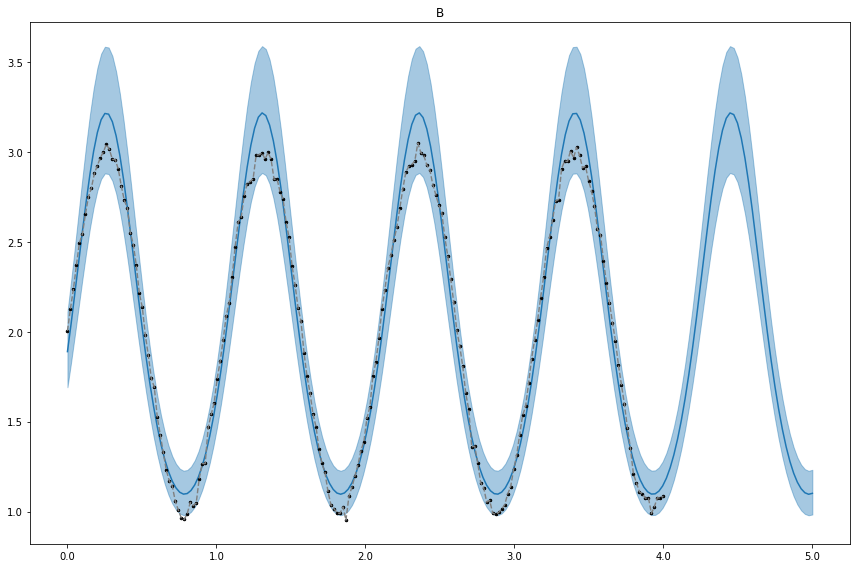

In [16]:
smlmc.predict(plot=True)

## CSM

In [17]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

,constant,mean,variance,phase,noise
Q,,,,,
0,[[0.9963379768565589]],[0.13487137408238936],[0.80269174597765],[[0.0]],NaN
1,[[0.2788239609305173]],[0.741221081703397],[0.5991720186942543],[[0.0]],NaN
2,[[0.7037194273515288]],[0.5547032658494007],[0.47896008867337736],[[0.0]],NaN
3,NaN,NaN,NaN,NaN,[0.5165723759826842]


In [18]:
csm.estimate_params(method='BNSE')
csm.print_params()

,constant,mean,variance,phase,noise
Q,,,,,
0,[[1.0]],[5.909103885485487],[0.48215450907673096],[[0.0]],NaN
1,[[1.0]],[3.845607290554047],[0.3575862581541589],[[0.0]],NaN
2,[[1.0]],[2.469942893933087],[0.3798731568585844],[[0.0]],NaN
3,NaN,NaN,NaN,NaN,[0.5165723759826842]


In [19]:
csm.train()
csm.print_params()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -495.318938
  Number of iterations: 101
  Number of functions evaluations: 129
Done in 0.0 minutes


,constant,mean,variance,phase,noise
Q,,,,,
0,[[0.00023085898182600374]],[8.360548015203184],[138.4594688791067],[[1.0000000002220446e-06]],NaN
1,[[0.14424927903506687]],[6.002554290069894],[1e-06],[[1.0000000002220446e-06]],NaN
2,[[0.0021122592693497057]],[12.005533318571993],[0.00012175170682852095],[[1.0000000002220446e-06]],NaN
3,NaN,NaN,NaN,NaN,[0.0002567154477706176]


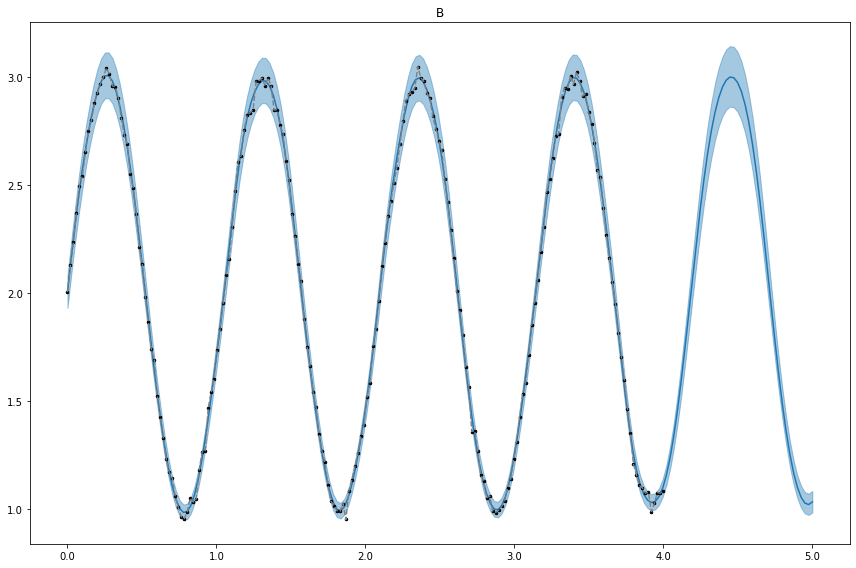

In [20]:
csm.predict(plot=True)

## CONV

In [21]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

,constant,variance,noise
Q,,,
0,[0.0213079448799125],[[0.0]],NaN
1,[0.4487333210423583],[[0.0]],NaN
2,[0.6465531084927619],[[0.0]],NaN
3,NaN,NaN,[0.5785744057584193]


In [22]:
conv.estimate_params(method='SM')
conv.print_params()

         Current function value: -446.764839
         Iterations: 64
         Function evaluations: 162
         Gradient evaluations: 150
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -446.764839
  Number of iterations: 64
  Number of functions evaluations: 162
Done in 0.0 minutes


,constant,variance,noise
Q,,,
0,[1.0],[[0.6347922942623564]],NaN
1,[1.0],[[1.8605969944967449]],NaN
2,[1.0],[[95.84316671231943]],NaN
3,NaN,NaN,[0.004744367711760713]


In [23]:
conv.train(method='Adam')
conv.print_params()

Done in 0.1 minutes


,constant,variance,noise
Q,,,
0,[0.49304957952682016],[[0.296136535070225]],NaN
1,[0.4891821450165418],[[1.089844858440486]],NaN
2,[0.5091328129724347],[[94.90353683804182]],NaN
3,NaN,NaN,[0.001822207432661909]


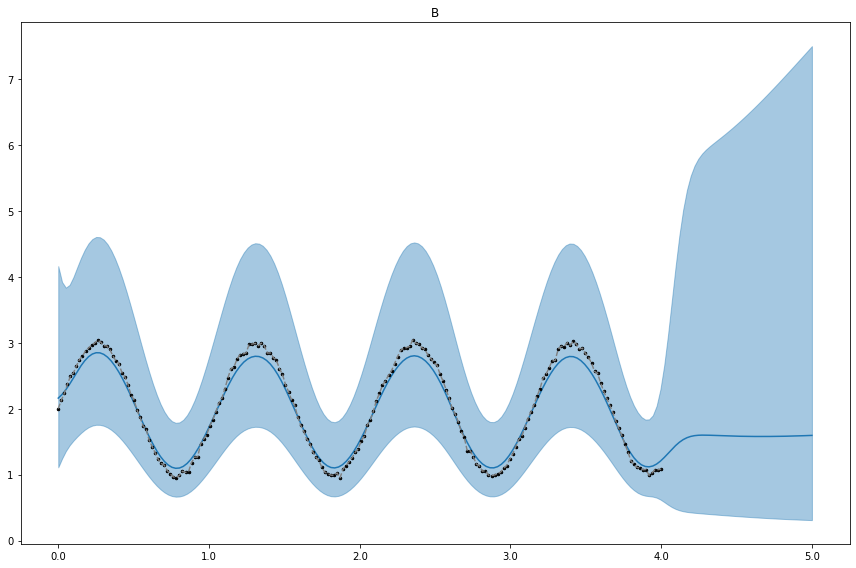

In [24]:
conv.predict(plot=True)

## Errors